# Homework 6 | AI 231 | Michael Spencer Quinto

- Identify the sub scope that you will focus on
- Find data that is related to the individual project you want
- Do EDA for the data set that you have selected.


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from IPython.display import display
from pathlib import Path

In [20]:
# dataset: https://www.kaggle.com/datasets/sartajbhuvaji/brain-tumor-classification-mri?resource=download:


training_file_path = Path("brain_tumor_dataset/Training")
testing_file_path = Path("brain_tumor_dataset/Testing")

# EDA


In [25]:
train_images_counts = {}
test_images_counts = {}

categories = ["glioma_tumor", "meningioma_tumor", "no_tumor", "pituitary_tumor"]

# Training
for category in categories:
    # print(category)
    train_category_path = training_file_path / category
    test_category_path = testing_file_path / category

    train_num_images = len(list(train_category_path.glob("*.jpg")))
    train_images_counts[category] = train_num_images

    test_num_images = len(list(test_category_path.glob("*.jpg")))
    test_images_counts[category] = test_num_images

In [26]:
print(train_images_counts)
print(test_images_counts)

{'glioma_tumor': 826, 'meningioma_tumor': 822, 'no_tumor': 395, 'pituitary_tumor': 827}
{'glioma_tumor': 100, 'meningioma_tumor': 115, 'no_tumor': 105, 'pituitary_tumor': 74}


In [28]:
def plot_counts(counts, title):
    plt.figure(figsize=(10, 6))
    plt.bar(counts.keys(), counts.values())
    plt.title(title)
    plt.xlabel("Categories")
    plt.ylabel("Number of Images")
    plt.show()

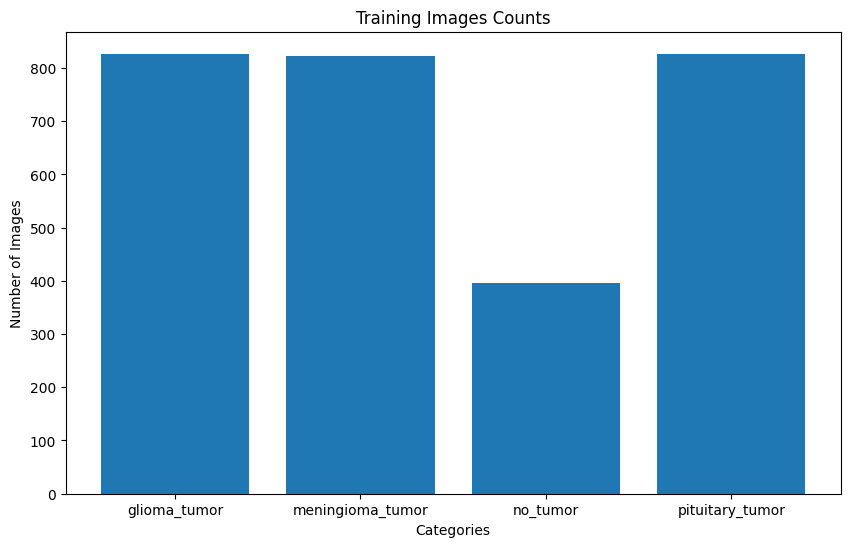

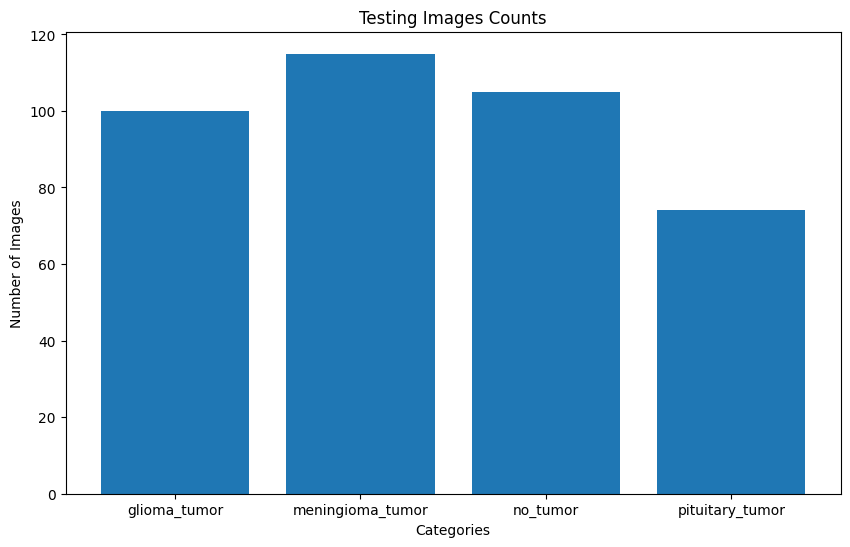

In [30]:
# Train Counts
plot_counts(train_images_counts, "Training Images Counts")

# Test Counts
plot_counts(test_images_counts, "Testing Images Counts")

In [38]:
import random


def plot_images(path: Path, categories: list[str], num_samples: int = 5):
    plt.figure(figsize=(15, 10))

    for i, category in enumerate(categories):
        category_path = path / category
        images = list(category_path.glob("*.jpg"))
        sample_images = random.sample(images, num_samples)

        for j, image in enumerate(sample_images):
            plt.subplot(num_samples, len(categories), i * len(categories) + j + 1)
            plt.imshow(plt.imread(image))
            plt.title(category)
            plt.axis("off")

    plt.tight_layout()
    plt.show()

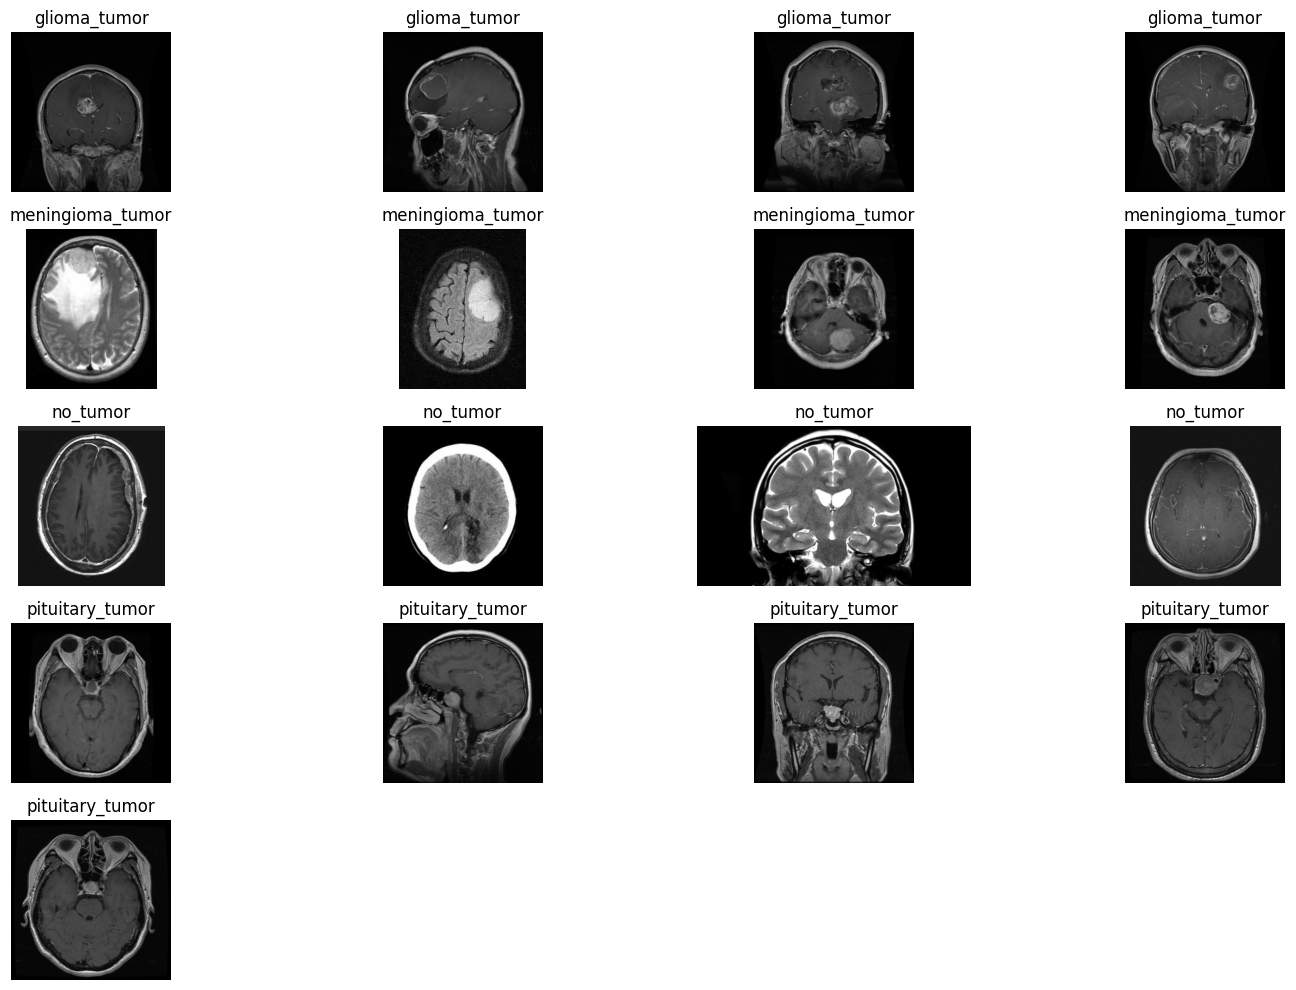

In [ ]:
# sample 1
plot_images(training_file_path, categories)

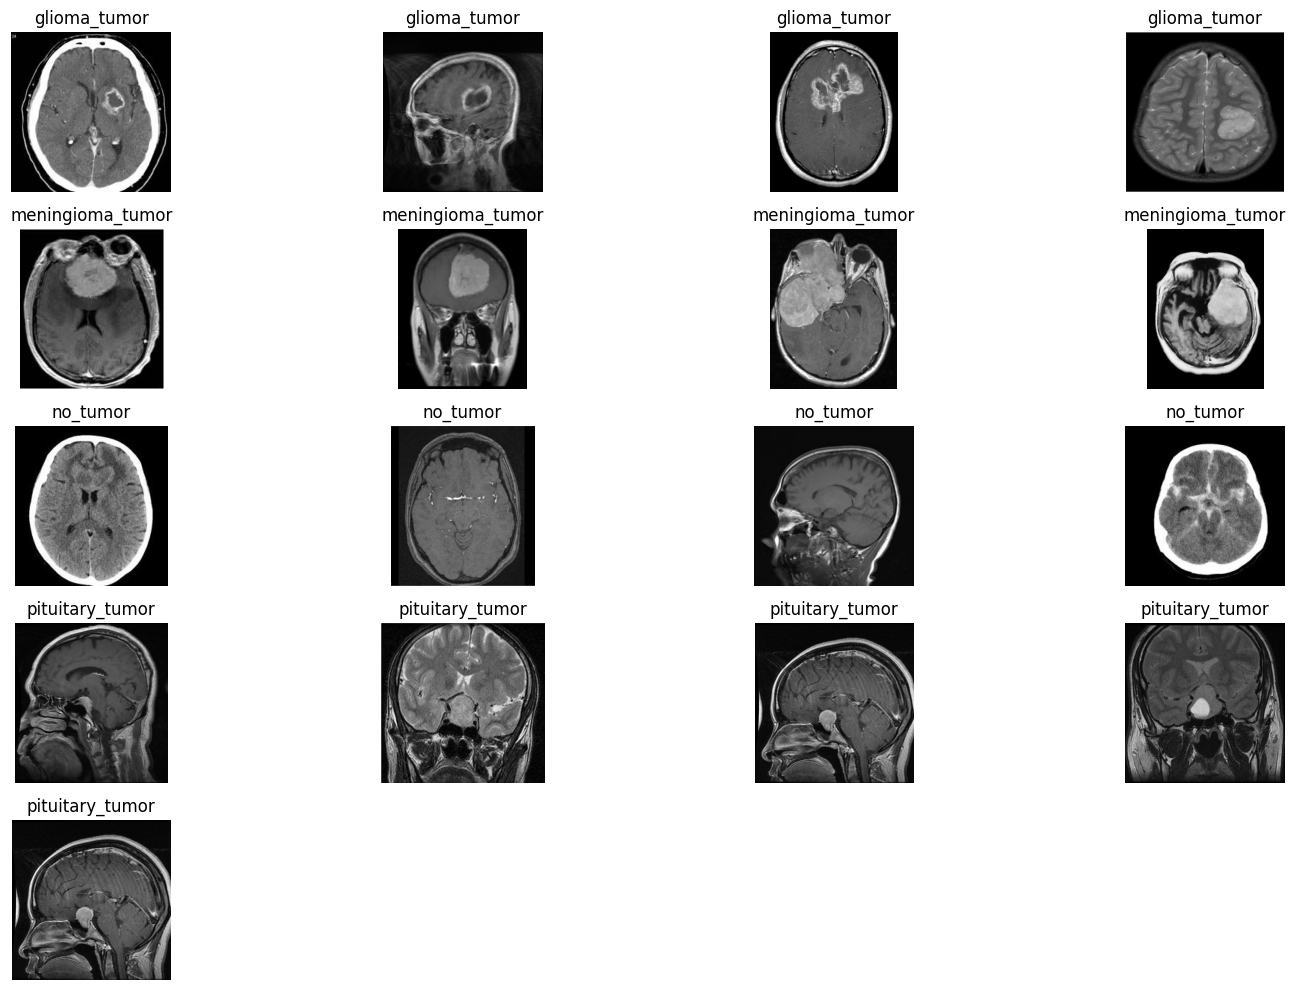

In [44]:
# sample 2
plot_images(testing_file_path, categories)

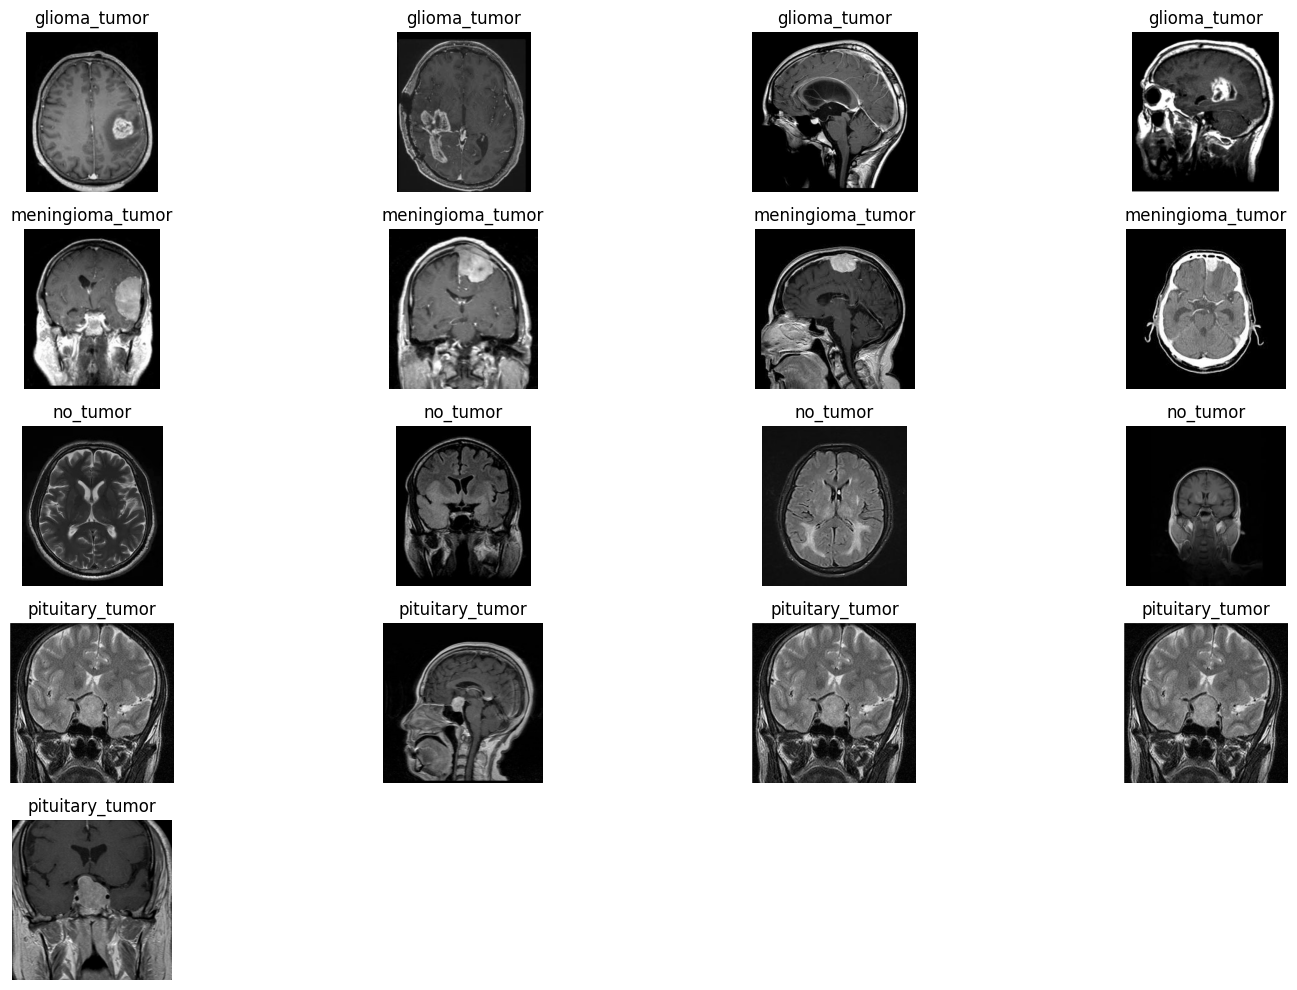

In [70]:
# sample 3
plot_images(testing_file_path, categories)

In [47]:
def check_image_dimensions(path: Path, categories: list[str], num_samples: int = 100):
    """
    Check the dimensions of a sample of images from each category.

    Args:
        path: Path to the dataset directory
        categories: List of category names
        num_samples: Number of samples to check from each category

    Returns:
        Dictionary with statistics about image dimensions
    """
    dimensions = {}

    for category in categories:
        category_path = path / category
        images = list(category_path.glob("*.jpg"))
        sample_images = random.sample(images, min(num_samples, len(images)))

        category_dimensions = []
        for image_path in sample_images:
            img = plt.imread(image_path)
            category_dimensions.append(img.shape)

        dimensions[category] = category_dimensions

    # Print summary
    print("Image Dimensions Summary:")
    for category, dims in dimensions.items():
        unique_dims = set(dims)
        print(f"\n{category}:")
        for dim in unique_dims:
            count = dims.count(dim)
            print(f"  {dim}: {count} images")

    return dimensions


# Check dimensions in training set
print("Training Images Dimensions:")
train_dimensions = check_image_dimensions(training_file_path, categories)

# Check dimensions in test set
print("\nTesting Images Dimensions:")
test_dimensions = check_image_dimensions(testing_file_path, categories)

Training Images Dimensions:
Image Dimensions Summary:

glioma_tumor:
  (512, 512, 3): 100 images

meningioma_tumor:
  (395, 367, 3): 1 images
  (367, 343, 3): 1 images
  (216, 216, 3): 1 images
  (237, 212, 3): 1 images
  (526, 530, 3): 1 images
  (340, 507, 3): 1 images
  (442, 442, 3): 1 images
  (225, 225, 3): 2 images
  (500, 455, 3): 1 images
  (369, 503, 3): 1 images
  (207, 201, 3): 1 images
  (512, 512, 3): 79 images
  (370, 374, 3): 1 images
  (237, 213, 3): 1 images
  (228, 221, 3): 1 images
  (337, 305, 3): 1 images
  (223, 200, 3): 1 images
  (674, 534, 3): 1 images
  (395, 341, 3): 1 images
  (243, 208, 3): 1 images
  (358, 314, 3): 1 images

no_tumor:
  (257, 235, 3): 1 images
  (243, 236, 3): 2 images
  (686, 626, 3): 1 images
  (225, 234, 3): 1 images
  (252, 236, 3): 1 images
  (500, 500, 3): 1 images
  (830, 1024, 3): 1 images
  (258, 314, 3): 1 images
  (213, 227, 3): 1 images
  (248, 237, 3): 1 images
  (848, 785, 3): 1 images
  (693, 800, 3): 1 images
  (496, 414, 

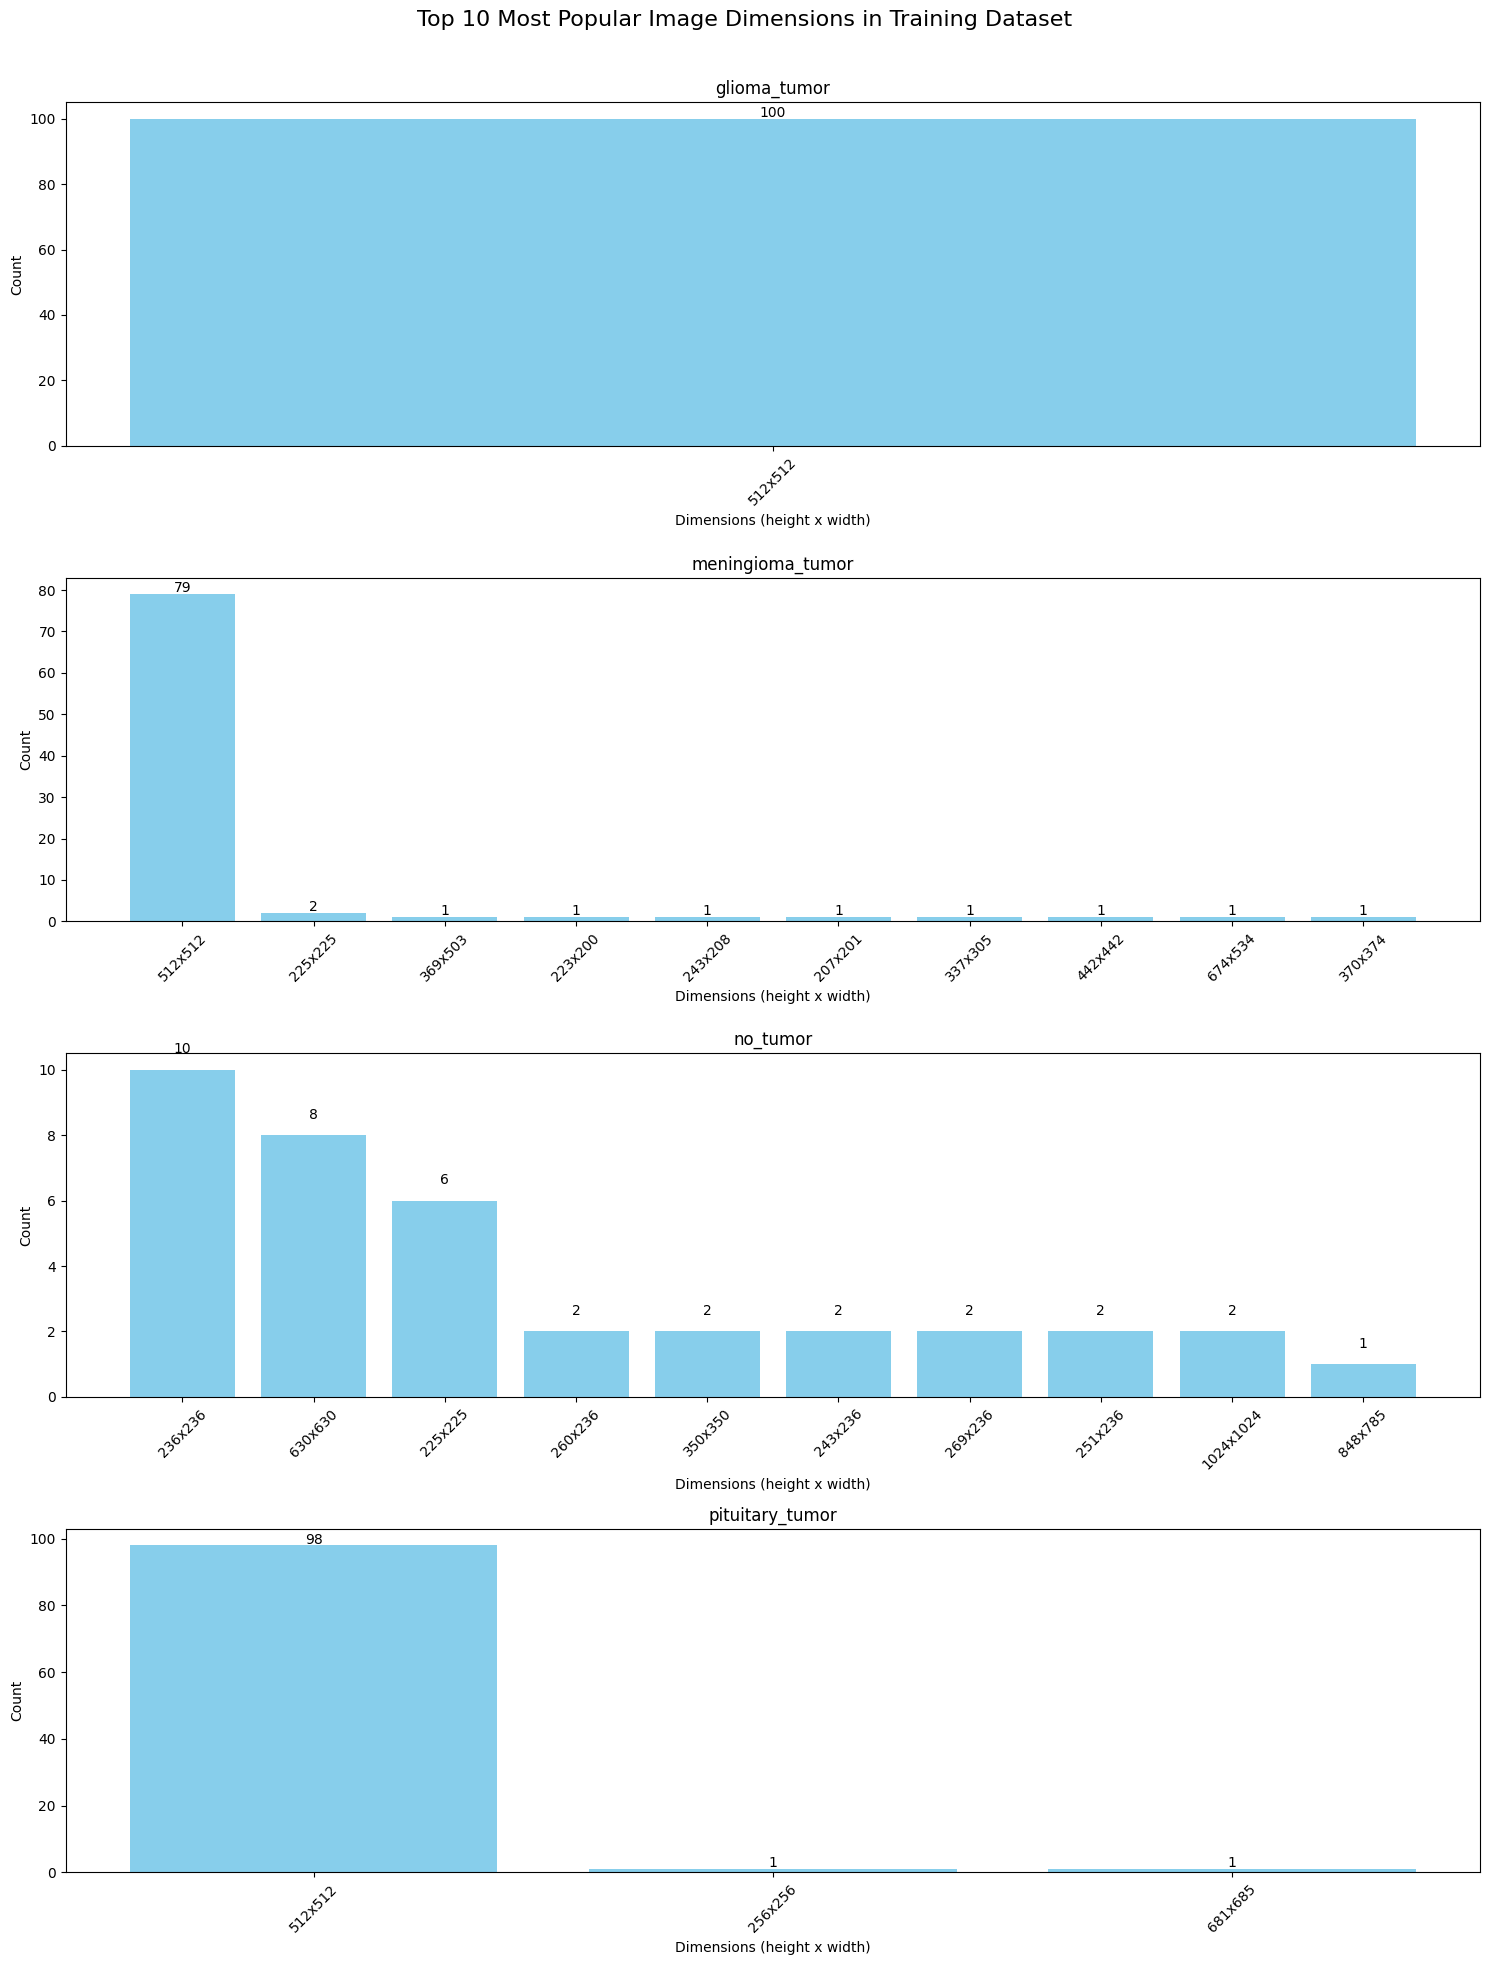

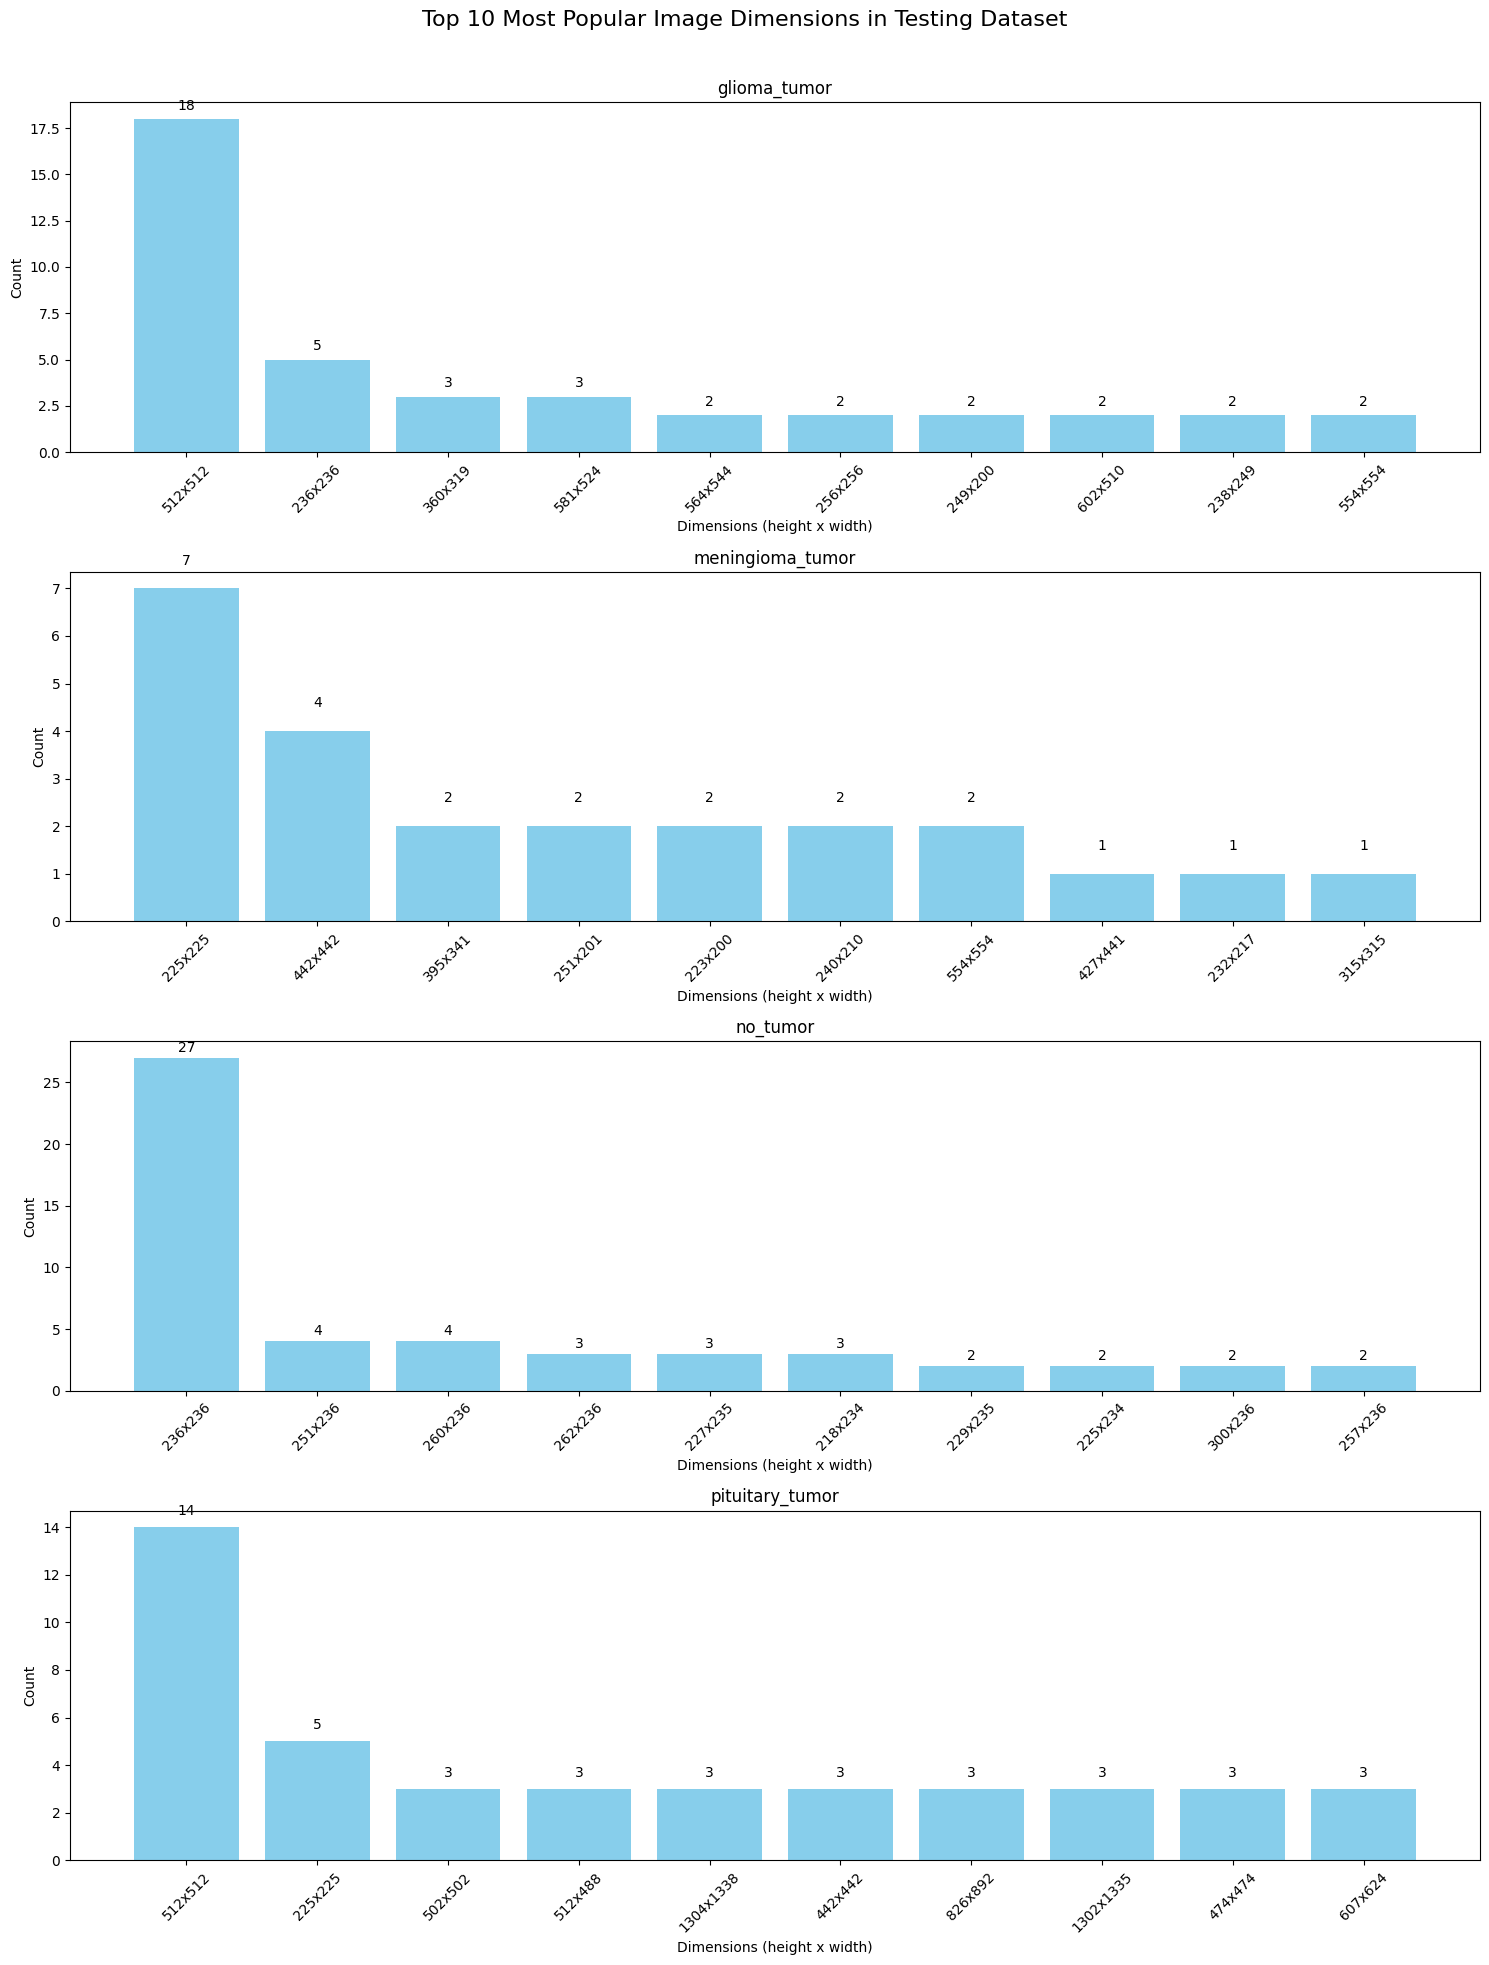

In [48]:
# Plot the top 10 most popular dimensions for each category
def plot_top_dimensions(dimensions, dataset_name):
    """
    Plot the top 10 most popular dimensions for each category.

    Args:
        dimensions: Dictionary with dimensions data from check_image_dimensions
        dataset_name: Name of the dataset (e.g., "Training" or "Testing")
    """
    fig, axes = plt.subplots(len(categories), 1, figsize=(15, 5 * len(categories)))
    fig.suptitle(
        f"Top 10 Most Popular Image Dimensions in {dataset_name} Dataset", fontsize=16
    )

    for i, category in enumerate(categories):
        # Count occurrences of each dimension
        dim_counts = {}
        for dim in dimensions[category]:
            dim_str = f"{dim[0]}x{dim[1]}"
            dim_counts[dim_str] = dim_counts.get(dim_str, 0) + 1

        # Sort by count and get top 10
        top_dims = sorted(dim_counts.items(), key=lambda x: x[1], reverse=True)[:10]

        # Extract dimensions and counts for plotting
        dims = [d[0] for d in top_dims]
        counts = [d[1] for d in top_dims]

        # Plot
        ax = axes[i] if len(categories) > 1 else axes
        ax.bar(dims, counts, color="skyblue")
        ax.set_title(f"{category}")
        ax.set_xlabel("Dimensions (height x width)")
        ax.set_ylabel("Count")
        ax.tick_params(axis="x", rotation=45)

        # Add count labels on top of bars
        for j, count in enumerate(counts):
            ax.text(j, count + 0.5, str(count), ha="center")

    plt.tight_layout(rect=[0, 0, 1, 0.97])  # Adjust layout to make room for suptitle
    plt.show()


# Plot for training dataset
plot_top_dimensions(train_dimensions, "Training")

# Plot for testing dataset
plot_top_dimensions(test_dimensions, "Testing")

# Analysis of Image Dimensions

Looking at the plots above, we can observe that the distribution of image sizes varies significantly across different categories:

1. Some categories (like 'pituitary') show a strong preference for a specific dimension (512x512), indicating standardized imaging protocols.

2. Other categories display more diversity in image dimensions, suggesting data collected from various sources or using different equipment.

3. The 'meningioma' category shows a more distributed pattern with several common dimensions, while 'glioma' has a few dominant sizes.

4. The 'notumor' category appears to have more standardized dimensions, possibly due to controlled acquisition methods.

This variation in image dimensions highlights the importance of preprocessing steps like resizing before training deep learning models to ensure consistent input sizes.


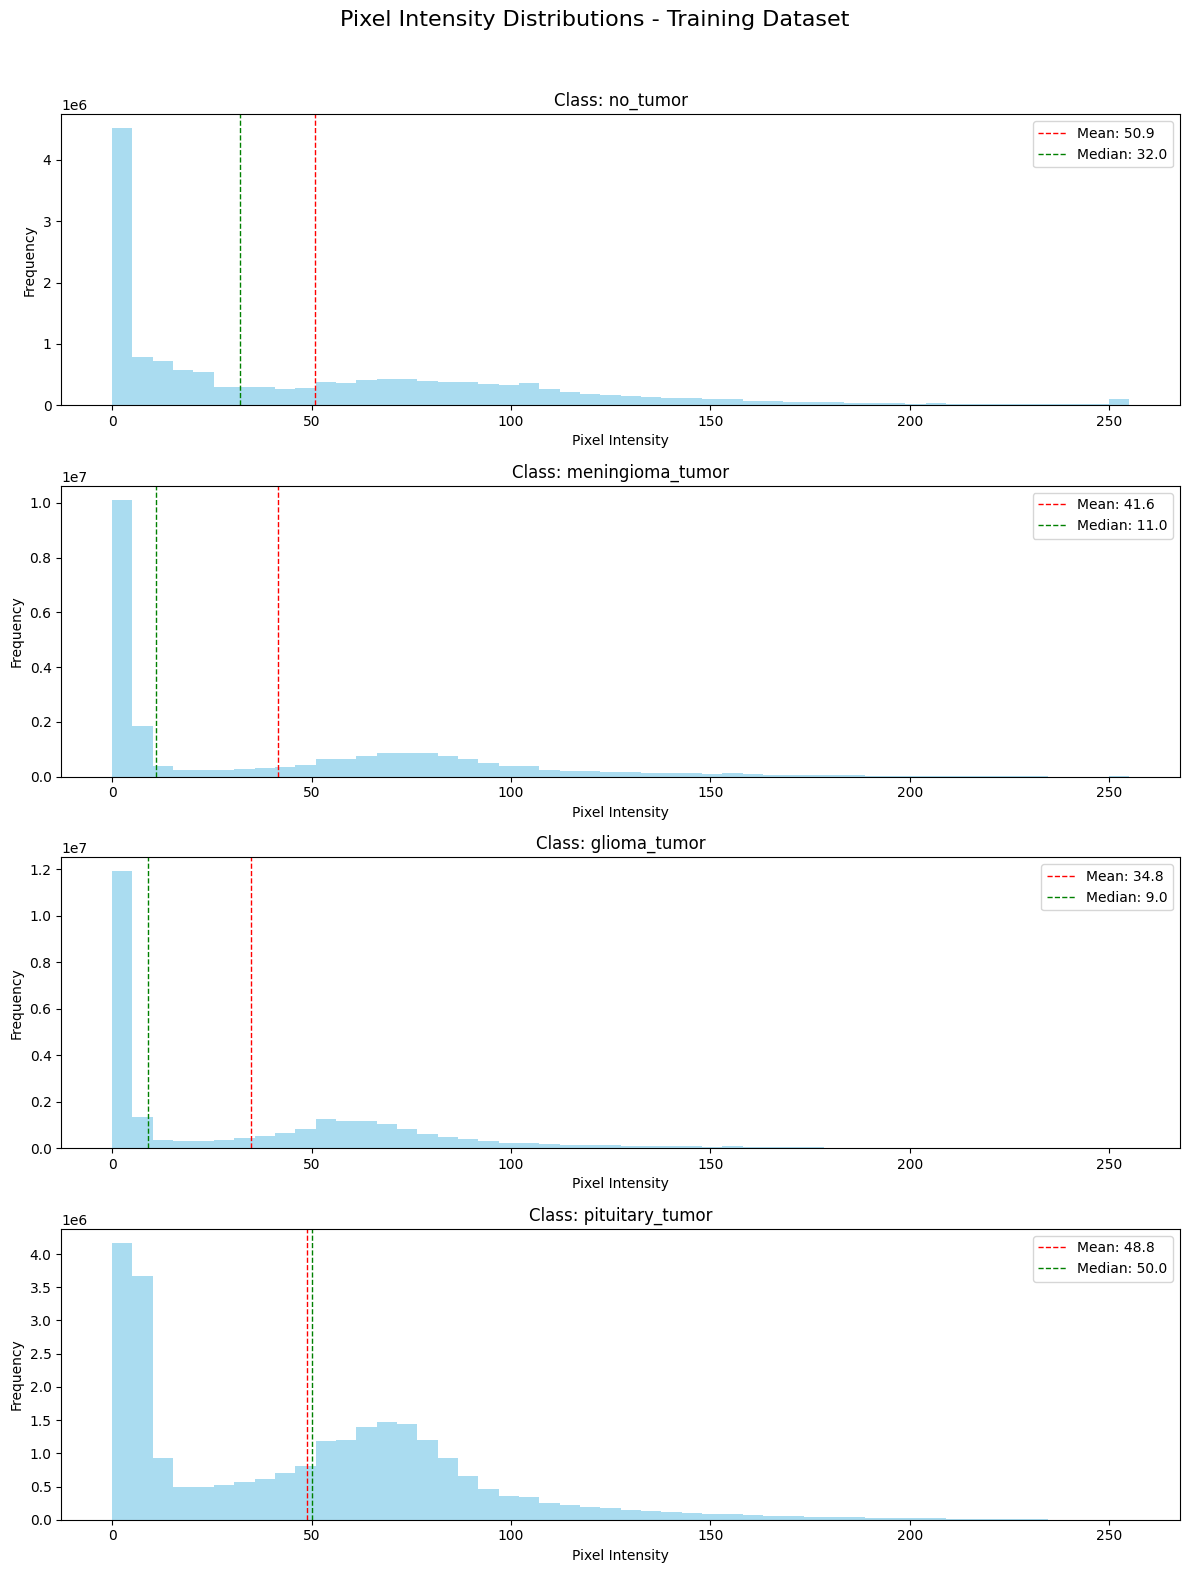

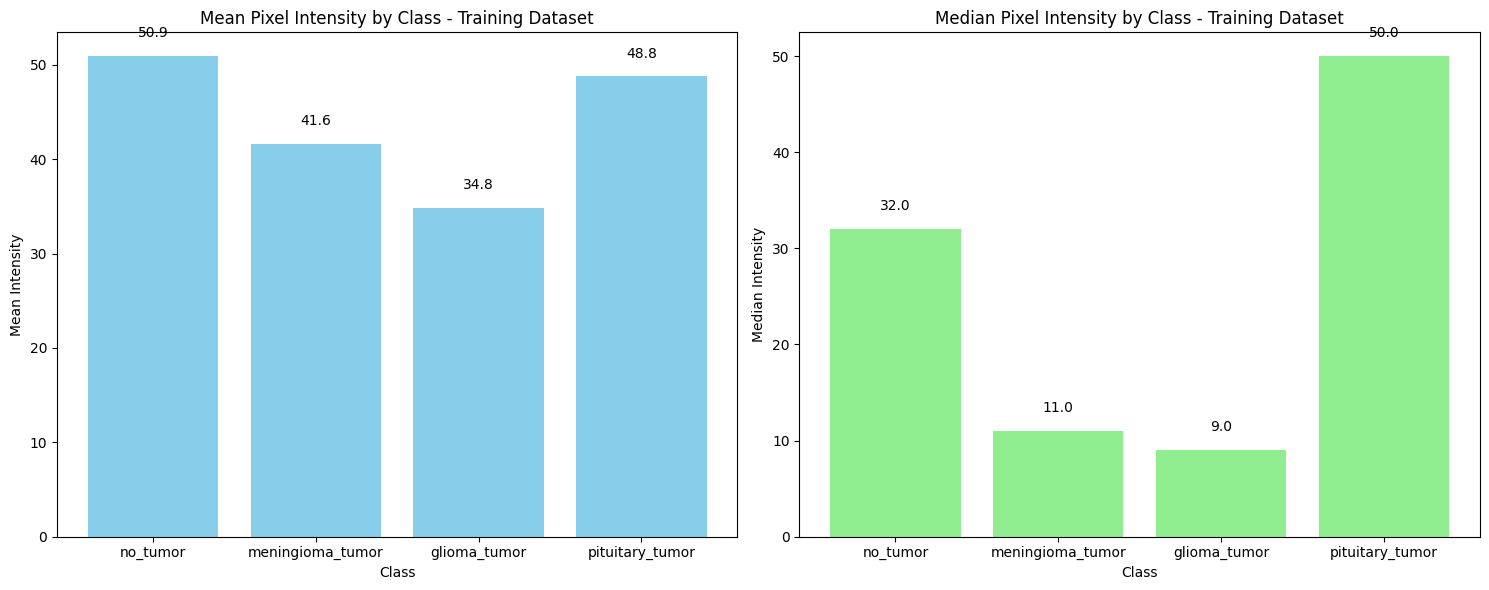

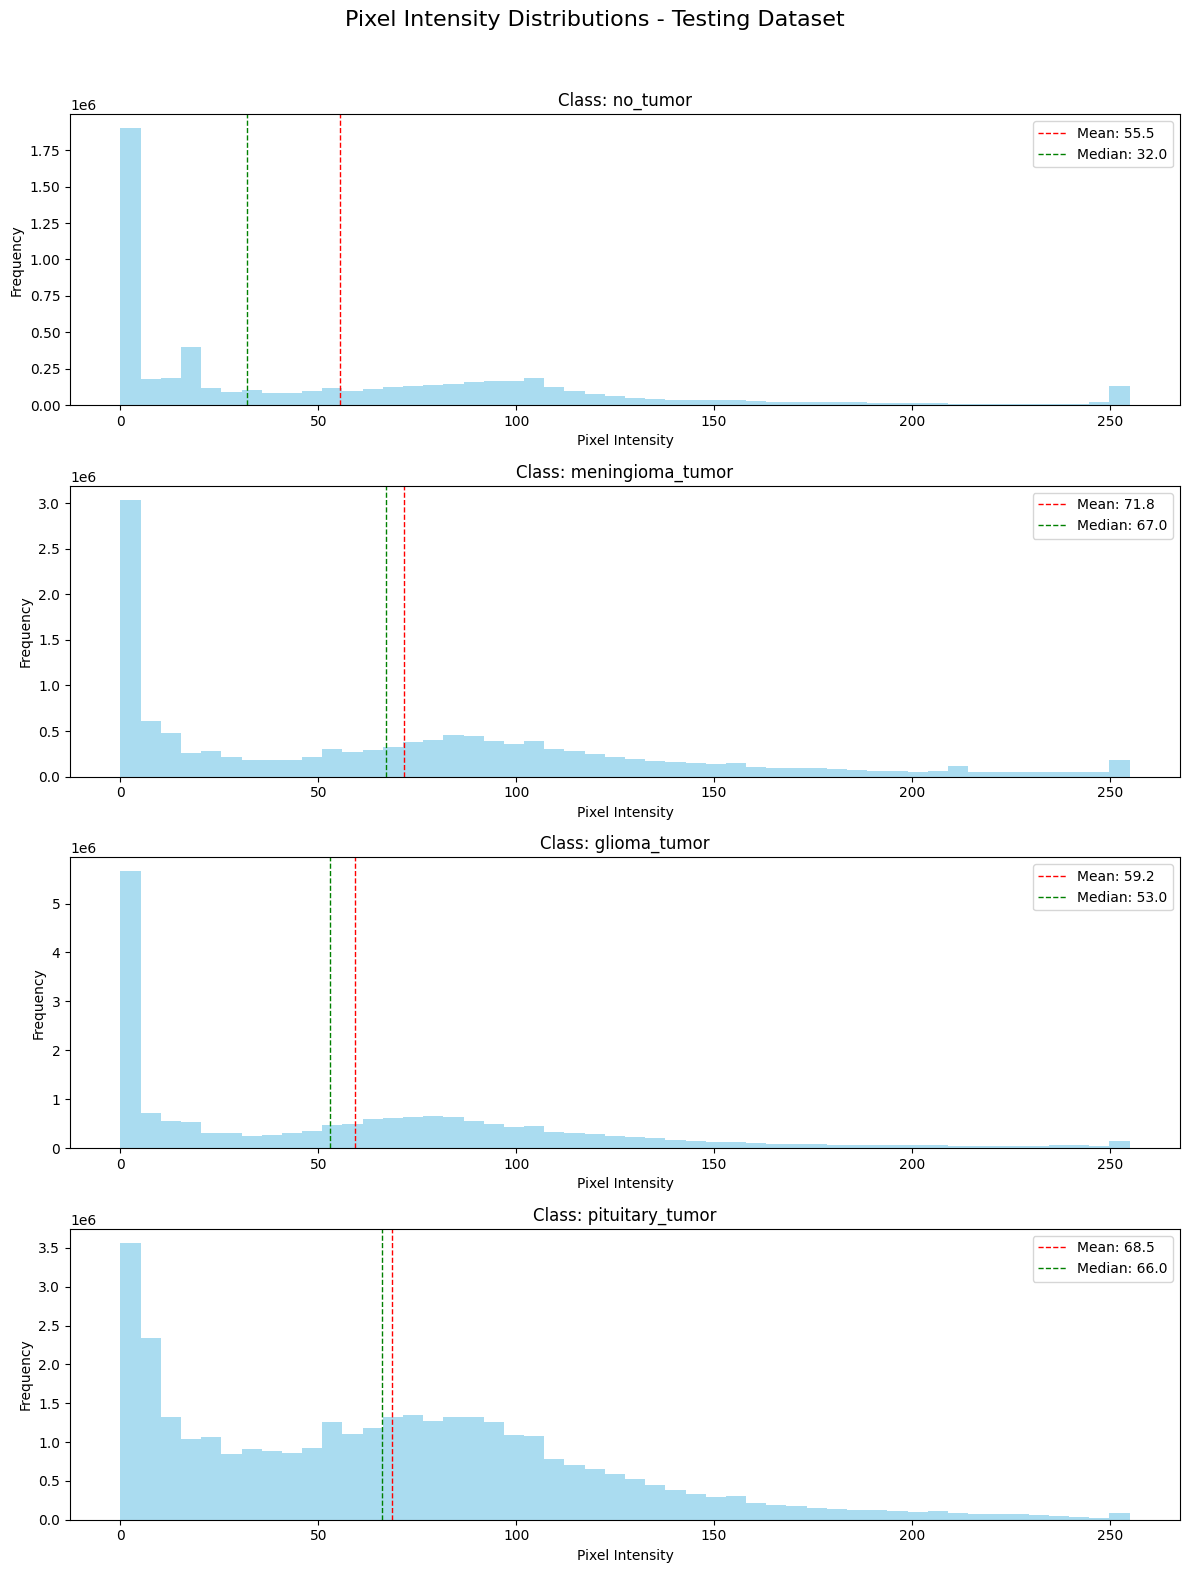

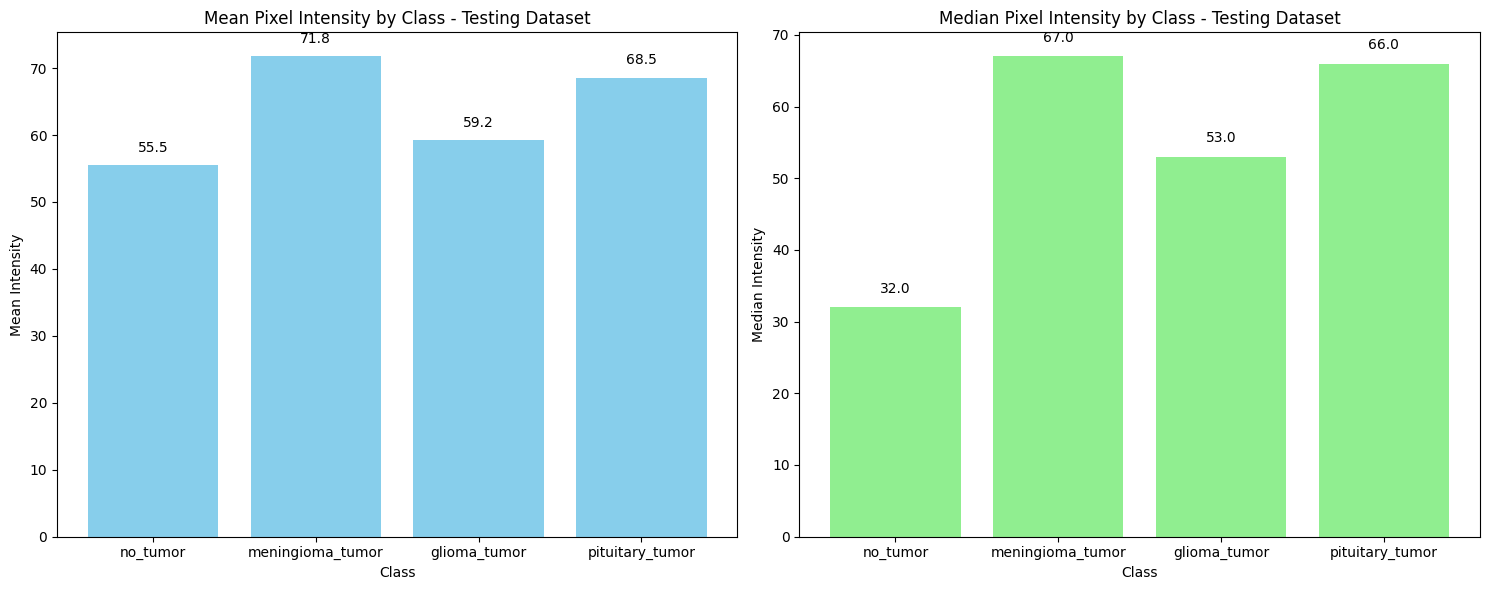

In [49]:
import cv2
from pathlib import Path
import os

# Analyze pixel intensity distributions across classes


def analyze_pixel_intensities(dataset_path: Path, title: str = "") -> None:
    """
    Analyze and plot pixel intensity distributions for each class in the dataset.

    Args:
        dataset_path: Path to the dataset directory containing class subdirectories
        title: Title for the plots
    """
    # Get class directories
    class_dirs = [d for d in dataset_path.iterdir() if d.is_dir()]

    # Set up the figure for histograms
    fig, axes = plt.subplots(len(class_dirs), 1, figsize=(12, 4 * len(class_dirs)))
    fig.suptitle(f"Pixel Intensity Distributions - {title}", fontsize=16)

    # For storing statistics
    stats = {"class": [], "mean": [], "median": [], "std": []}

    # Process each class
    for i, class_dir in enumerate(class_dirs):
        label = class_dir.name
        img_paths = (
            list(class_dir.glob("*.jpg"))
            + list(class_dir.glob("*.png"))
            + list(class_dir.glob("*.jpeg"))
        )

        # Sample images if there are too many (for performance)
        sample_size = min(100, len(img_paths))
        sampled_paths = random.sample(img_paths, sample_size)

        # Collect pixel values
        all_pixels = []
        for path in sampled_paths:
            img = cv2.imread(str(path), cv2.IMREAD_GRAYSCALE)
            if img is not None:
                # Flatten the image to get all pixel values
                all_pixels.extend(img.flatten())

        # Calculate statistics
        mean_val = np.mean(all_pixels)
        median_val = np.median(all_pixels)
        std_val = np.std(all_pixels)

        # Store statistics
        stats["class"].append(label)
        stats["mean"].append(mean_val)
        stats["median"].append(median_val)
        stats["std"].append(std_val)

        # Plot histogram
        ax = axes[i] if len(class_dirs) > 1 else axes
        ax.hist(all_pixels, bins=50, alpha=0.7, color="skyblue")
        ax.axvline(
            mean_val,
            color="red",
            linestyle="dashed",
            linewidth=1,
            label=f"Mean: {mean_val:.1f}",
        )
        ax.axvline(
            median_val,
            color="green",
            linestyle="dashed",
            linewidth=1,
            label=f"Median: {median_val:.1f}",
        )
        ax.set_title(f"Class: {label}")
        ax.set_xlabel("Pixel Intensity")
        ax.set_ylabel("Frequency")
        ax.legend()

    plt.tight_layout(rect=(0, 0, 1, 0.96))
    plt.show()

    # Plot comparison of means and medians across classes
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

    # Plot means
    ax1.bar(stats["class"], stats["mean"], color="skyblue")
    ax1.set_title(f"Mean Pixel Intensity by Class - {title}")
    ax1.set_xlabel("Class")
    ax1.set_ylabel("Mean Intensity")
    for i, v in enumerate(stats["mean"]):
        ax1.text(i, v + 2, f"{v:.1f}", ha="center")

    # Plot medians
    ax2.bar(stats["class"], stats["median"], color="lightgreen")
    ax2.set_title(f"Median Pixel Intensity by Class - {title}")
    ax2.set_xlabel("Class")
    ax2.set_ylabel("Median Intensity")
    for i, v in enumerate(stats["median"]):
        ax2.text(i, v + 2, f"{v:.1f}", ha="center")

    plt.tight_layout()
    plt.show()


# Analyze training dataset
analyze_pixel_intensities(Path("brain_tumor_dataset/Training"), "Training Dataset")

# Analyze testing dataset
analyze_pixel_intensities(Path("brain_tumor_dataset/Testing"), "Testing Dataset")

Pixel intensity refers to the brightness value of each pixel in an image, typically ranging from 0 (black) to 255 (white) in grayscale images. In MRI scans, these intensity values correspond to different tissue properties:


# Based on the pixel intensity analysis:

- Training Dataset: The mean pixel intensities vary across classes with no_tumor (~50) and pituitary_tumor (~48) showing higher brightness values compared to meningioma_tumor (~40) and glioma_tumor (~35).

- Testing Dataset: Similar patterns are observed, but with more pronounced differences in median values - pituitary_tumor shows significantly higher median values (~45) compared to other tumor classes (~10-12).

# These intensity differences suggest:

1. Different tumor types have distinct brightness signatures in MRI scans
2. Models may rely on these intensity patterns for classification
3. Preprocessing steps like normalization will be crucial to handle these variations
4. Feature extraction methods should consider intensity distributions as potentially discriminative features


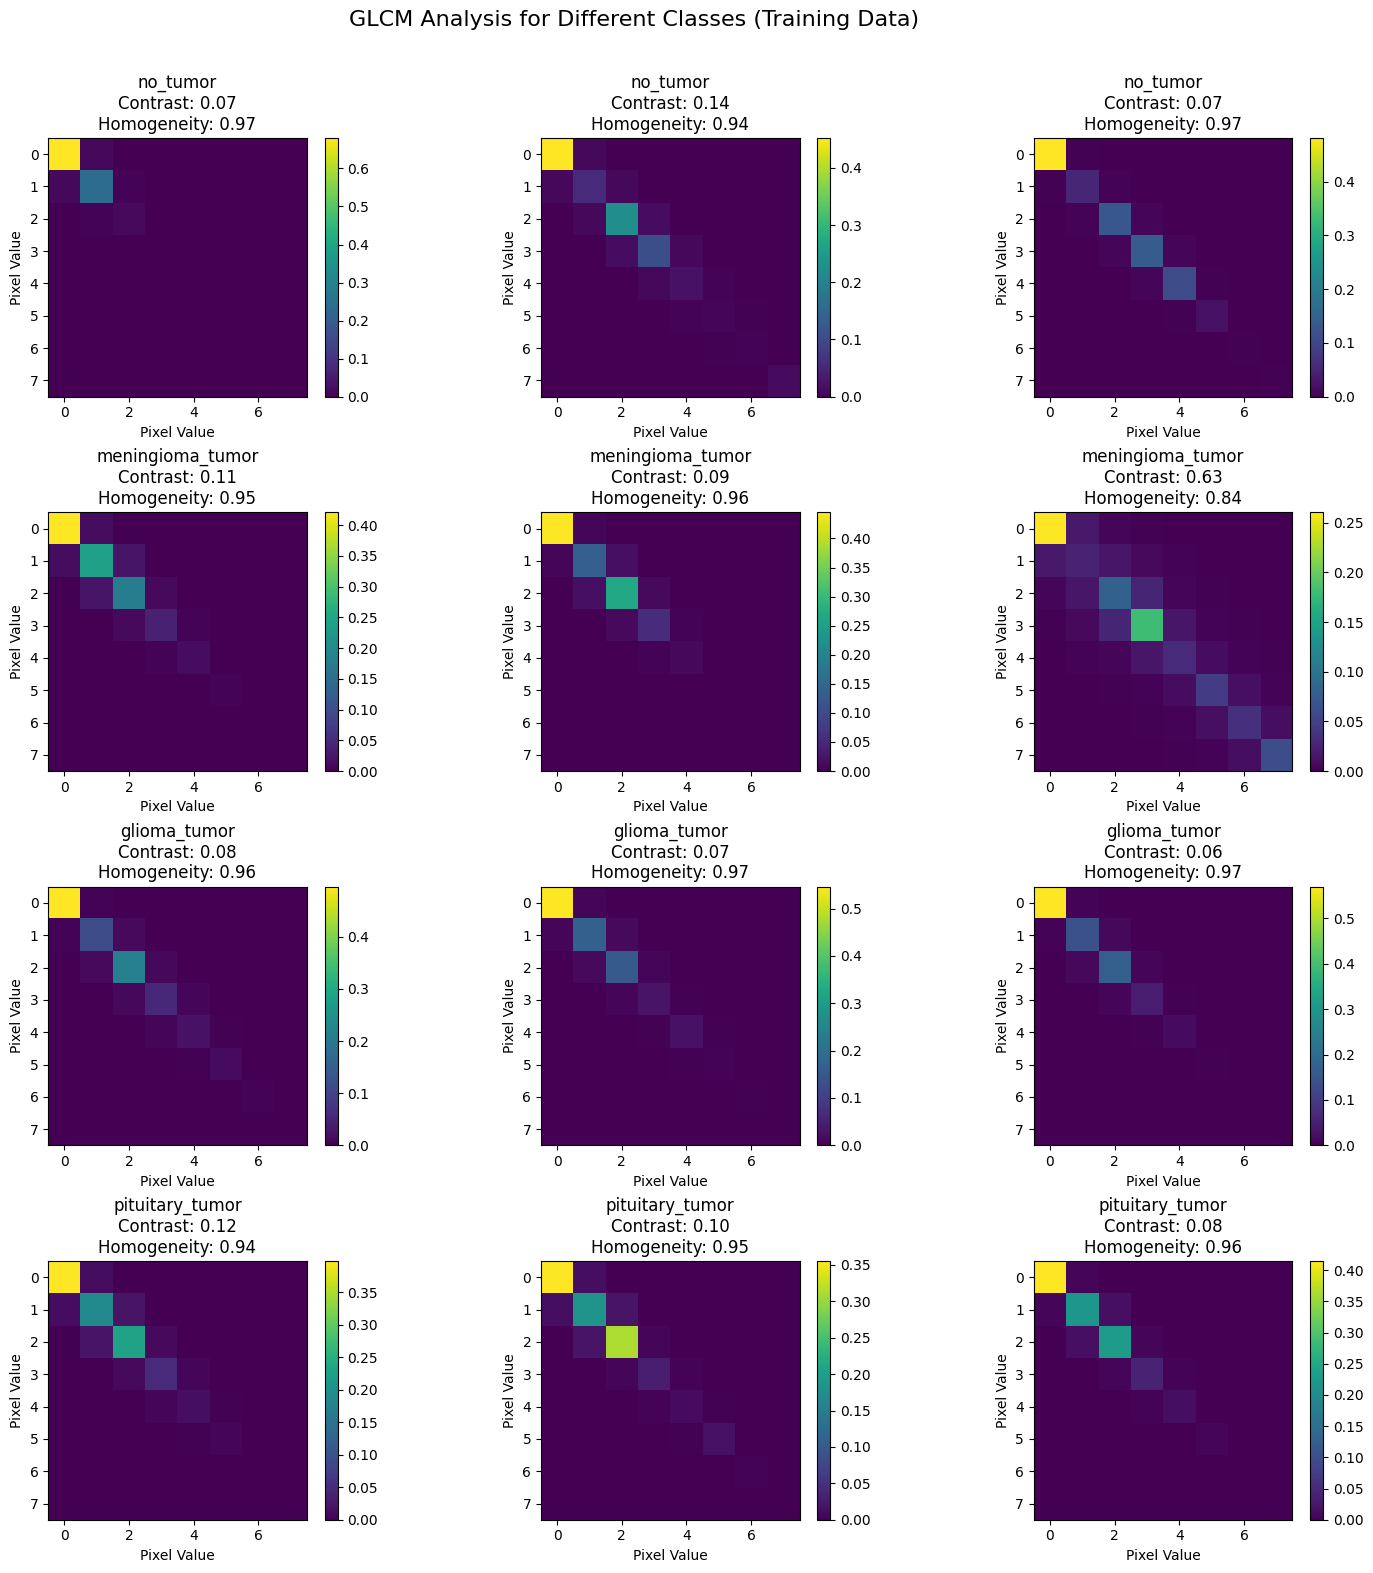

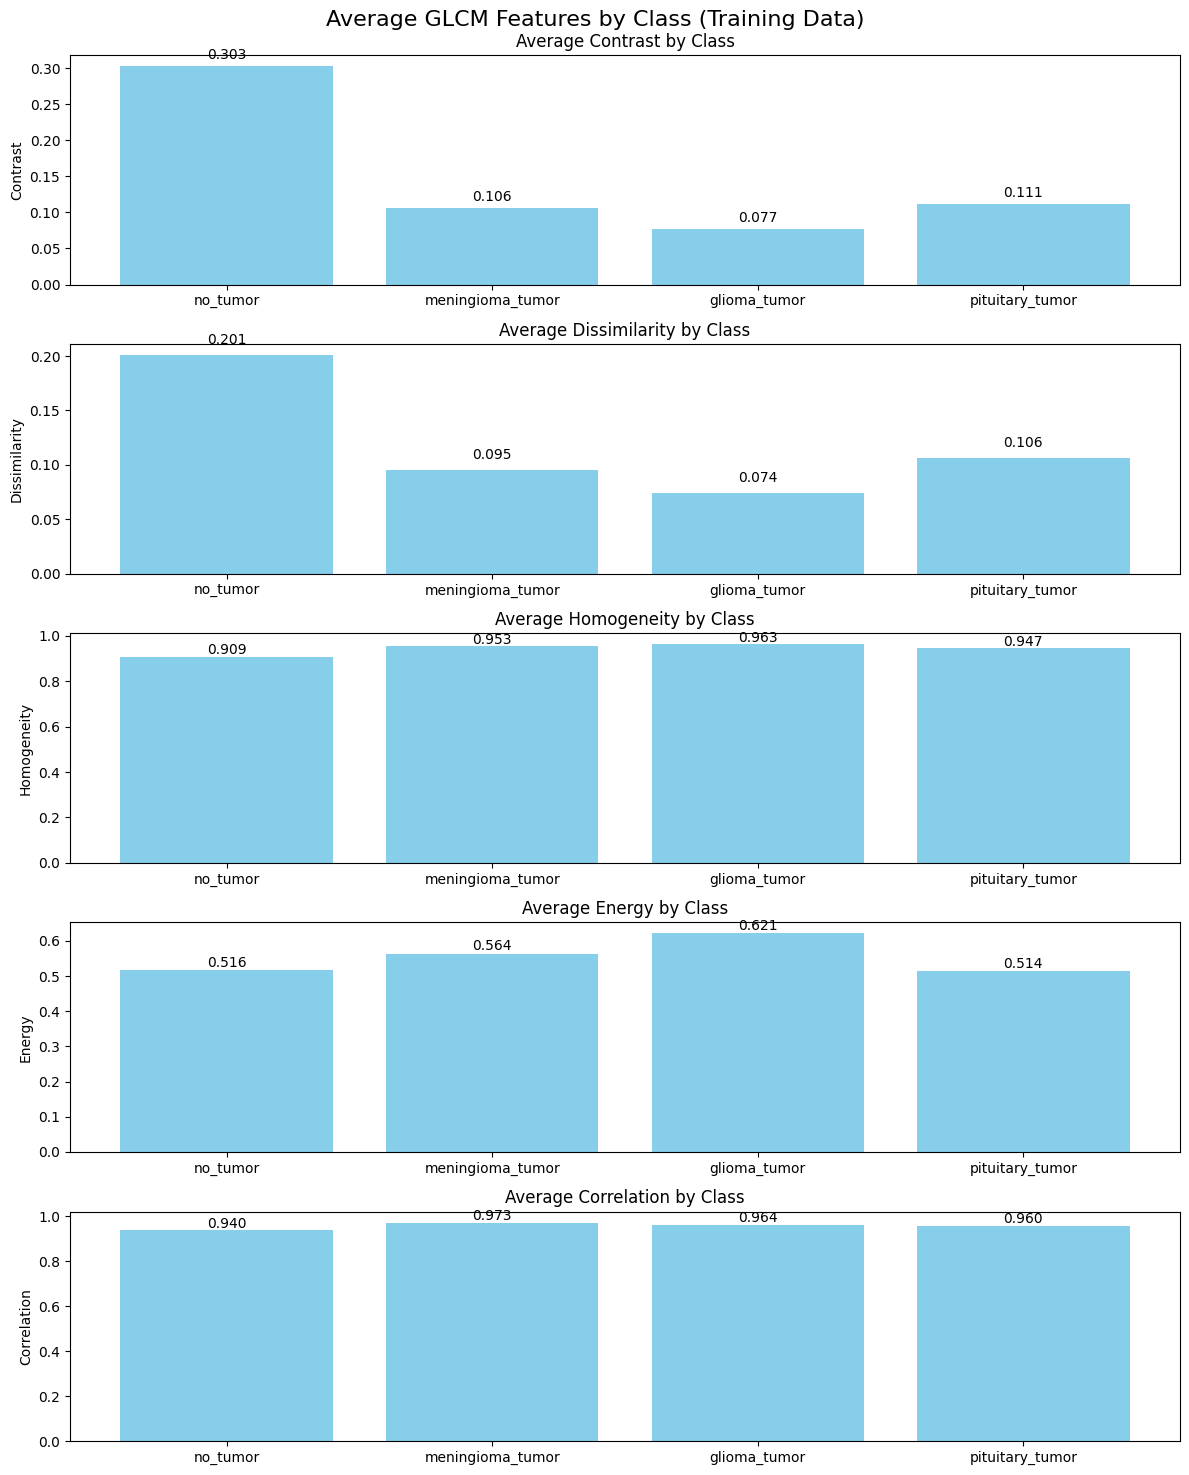

In [51]:
# GLCM (Gray-Level Co-occurrence Matrix) Analysis
from skimage.feature import graycomatrix, graycoprops
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import cv2
import random


def compute_glcm_features(
    image, distances=[1], angles=[0, np.pi / 4, np.pi / 2, 3 * np.pi / 4]
):
    """Compute GLCM features for a given image."""
    # Convert to grayscale if needed
    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Normalize to 8 levels to reduce computation and make visualization clearer
    bins = 8
    image = (image // (256 // bins)).astype(np.uint8)

    # Calculate GLCM
    glcm = graycomatrix(
        image,
        distances=distances,
        angles=angles,
        levels=bins,
        symmetric=True,
        normed=True,
    )

    # Calculate GLCM properties
    contrast = graycoprops(glcm, "contrast")[0, 0]
    dissimilarity = graycoprops(glcm, "dissimilarity")[0, 0]
    homogeneity = graycoprops(glcm, "homogeneity")[0, 0]
    energy = graycoprops(glcm, "energy")[0, 0]
    correlation = graycoprops(glcm, "correlation")[0, 0]

    return {
        "glcm": glcm,
        "contrast": contrast,
        "dissimilarity": dissimilarity,
        "homogeneity": homogeneity,
        "energy": energy,
        "correlation": correlation,
    }


def plot_glcm_for_classes(data_path, num_samples=3):
    """Plot GLCM matrices for each class."""
    data_path = Path(data_path)
    classes = [d.name for d in data_path.iterdir() if d.is_dir()]

    fig, axes = plt.subplots(len(classes), num_samples, figsize=(15, 4 * len(classes)))

    for i, class_name in enumerate(classes):
        class_path = data_path / class_name
        image_files = list(class_path.glob("*.jpg"))

        # Select random samples
        selected_files = random.sample(image_files, min(num_samples, len(image_files)))

        for j, img_file in enumerate(selected_files):
            # Read image
            img = cv2.imread(str(img_file))
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

            # Compute GLCM features
            glcm_features = compute_glcm_features(img)

            # Plot GLCM matrix
            ax = axes[i, j]
            im = ax.imshow(glcm_features["glcm"][:, :, 0, 0], cmap="viridis")
            ax.set_title(
                f"{class_name}\nContrast: {glcm_features['contrast']:.2f}\nHomogeneity: {glcm_features['homogeneity']:.2f}"
            )
            ax.set_xlabel("Pixel Value")
            ax.set_ylabel("Pixel Value")
            fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)

    plt.tight_layout()
    plt.suptitle("GLCM Analysis for Different Classes (Training Data)", fontsize=16)
    plt.subplots_adjust(top=0.9)
    plt.show()


# Generate GLCM plots for each class in the training dataset
plot_glcm_for_classes("brain_tumor_dataset/Training")


# Compute and visualize average GLCM features for each class
def analyze_glcm_features_by_class(data_path, max_samples=50):
    """Compute average GLCM features for each class."""
    data_path = Path(data_path)
    classes = [d.name for d in data_path.iterdir() if d.is_dir()]

    # Initialize dictionary to store features
    class_features = {
        cls: {
            "contrast": [],
            "dissimilarity": [],
            "homogeneity": [],
            "energy": [],
            "correlation": [],
        }
        for cls in classes
    }

    # Compute features for each image
    for class_name in classes:
        class_path = data_path / class_name
        image_files = list(class_path.glob("*.jpg"))

        # Limit number of samples for efficiency
        selected_files = random.sample(image_files, min(max_samples, len(image_files)))

        for img_file in selected_files:
            img = cv2.imread(str(img_file))
            features = compute_glcm_features(img)

            for feature_name in [
                "contrast",
                "dissimilarity",
                "homogeneity",
                "energy",
                "correlation",
            ]:
                class_features[class_name][feature_name].append(features[feature_name])

    # Compute averages
    avg_features = {
        cls: {feature: np.mean(values) for feature, values in features.items()}
        for cls, features in class_features.items()
    }

    # Plot average features
    feature_names = [
        "contrast",
        "dissimilarity",
        "homogeneity",
        "energy",
        "correlation",
    ]

    fig, axes = plt.subplots(len(feature_names), 1, figsize=(12, 15))

    for i, feature in enumerate(feature_names):
        values = [avg_features[cls][feature] for cls in classes]
        axes[i].bar(classes, values, color="skyblue")
        axes[i].set_title(f"Average {feature.capitalize()} by Class")
        axes[i].set_ylabel(feature.capitalize())

        # Add value labels
        for j, v in enumerate(values):
            axes[i].text(j, v + 0.01, f"{v:.3f}", ha="center")

    plt.tight_layout()
    plt.suptitle("Average GLCM Features by Class (Training Data)", fontsize=16)
    plt.subplots_adjust(top=0.95)
    plt.show()


# Analyze average GLCM features for each class
analyze_glcm_features_by_class("brain_tumor_dataset/Training")

# GLCM Feature Analysis

The Gray Level Co-occurrence Matrix (GLCM) features provide important textural information about the brain tumor images. Looking at the average values across classes:

## Contrast

Measures the local variations in the gray-level co-occurrence matrix. Higher values indicate more contrast between neighboring pixels.

- The 'no_tumor' class shows significantly higher contrast than other classes, suggesting that normal brain tissue has more varied texture patterns.
- Tumor classes (meningioma, glioma, pituitary) show lower contrast, indicating more homogeneous texture regions.

## Dissimilarity

Similar to contrast but measures the variation using absolute difference rather than squares.

- Again, 'no_tumor' class has higher dissimilarity, reinforcing that normal brain tissue has more textural variation.
- Tumor tissues appear to have more similar neighboring pixel values.

## Homogeneity

Measures how close the distribution of elements in the GLCM is to the GLCM diagonal.

- 'no_tumor' class shows lower homogeneity, consistent with its higher contrast and dissimilarity.
- Tumor classes have higher homogeneity, indicating smoother textures within tumor regions.

## Energy

Also known as uniformity or angular second moment, measures the textural uniformity. In simpler terms, energy tells us how "orderly" or "smooth" an image is - higher energy means the image has more repeated patterns or is more uniform.

- Values are relatively similar across classes, with tumor classes showing slightly higher energy.
- This suggests that tumor regions have somewhat more uniform texture patterns, meaning the pixels in tumor areas tend to have a more consistent appearance.

## Correlation

Measures the linear dependency of gray levels on those of neighboring pixels. In everyday language, correlation shows how predictable a pixel is based on its neighbors - high correlation means if you know one pixel's value, you can better guess its neighbor's value.

- All classes show high correlation values, indicating strong linear relationships between neighboring pixels.
- 'no_tumor' class has slightly higher correlation, suggesting more structured patterns in normal brain tissue, where pixel values change more predictably from one to the next.

### Clinical Implications

These textural differences could be valuable for automated tumor classification:

- Normal brain tissue ('no_tumor') consistently shows different textural properties from tumor tissues
- The three tumor types show more subtle differences between them, which might make their distinction more challenging
- These features could be combined with other imaging characteristics for more robust classification
